In [68]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from scipy import stats
import os
import json
import pandas as pd
import root_pandas as rpd


Welcome to JupyROOT 6.18/00


In [69]:
def load_data_rpd(file_name, branches, process,treedir,selection='',entrystop=None,):

    root_file = uproot.open(file_name)
    df = rpd.read_root(file_name,treedir+process, columns = branches).query(selection)
    print("Entries in ntuple:")
    print(len(df))
    return df

In [62]:
def load_data(file_name, branches, process,treedir,selection='',entrystop=None,):

    root_file = uproot.open(file_name)
    df = root_file[treedir+process].pandas.df(branches, entrystop=entrystop).dropna()
    if selection!='' :
        print 'applying ',selection
        df = df.query(selection)
    print("Entries in ntuple:")
    print(len(df))
    return df

In [71]:
year='2018'


indir = '/work/nchernya/HHbbgg_ETH_devel/root_files/gghh_2jets/'

file_VBFHH = 'VBFHHTo2B2G_CV_1_C2V_1_C3_1_Era2018_RR-17Sep2018_v2.root'
file_ggHH_NLO = 'GluGluToHHTo2B2G_node_cHHH1_Era2018_RR-17Sep2018_v2.root'
file_ggHH_LO = 'GluGluToHHTo2B2G_Era2018_RR-17Sep2018_v2.root'
file_ggHH_2jets = 'GluGluToHHTo2B2G012Jets_SM_Era2018_RR-17Sep2018_v2.root'

process_VBFHH = 'VBFHHTo2B2G_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV_madgraph_pythia8_13TeV_VBFDoubleHTag_0'
process_ggHH_NLO = 'hh2018_13TeV_125_13TeV_VBFDoubleHTag_0'
process_ggHH_LO = 'hh2018_13TeV_125_13TeV_VBFDoubleHTag_0'
process_ggHH_2jets = 'ggHHTo2B2G_012Jets_SM_13TeV_VBFDoubleHTag_0'

#features = ['diHiggs_pt','diHiggs_mass','genMhh','MX','dijet_pt','dijet_eta','diphoton_pt','diphoton_eta','weight',
#            'CMS_hgg_mass','leadingJet_DeepFlavour','subleadingJet_DeepFlavour',
#            'absCosThetaStar_CS','absCosTheta_bb','absCosTheta_gg','customLeadingPhotonIDMVA',
#            'customSubLeadingPhotonIDMVA','leadingPhotonSigOverE','subleadingPhotonSigOverE',
#            'sigmaMOverM','leadingPhoton_pt','leadingPhoton_eta',
#            'subleadingPhoton_pt','subleadingPhoton_eta',
#            'leadingJet_pt','leadingJet_eta','subleadingJet_eta','subleadingJet_pt']
#features = ['HHbbggMVA','diHiggs_pt','diHiggs_mass','genMhh','MX','dijet_pt','dijet_eta','diphoton_pt','diphoton_eta','weight',
#            'absCosThetaStar_CS','absCosTheta_bb','absCosTheta_gg','leadingPhoton_pt','leadingPhoton_eta',
#            'subleadingPhoton_pt','subleadingPhoton_eta',
#            'leadingJet_pt','leadingJet_eta','subleadingJet_eta','subleadingJet_pt']
#features += 'VBFDelta_phi,VBFJet_mjj,VBFProd_eta,VBFJet_Delta_eta,VBFCentrality_jg,VBFCentrality_jb,VBFDeltaR_jg,VBFDeltaR_jb,VBFleadJet_pt,VBFleadJet_eta,VBFsubleadJet_pt,VBFsubleadJet_eta'.split(',')
features = 'HHbbggMVA,weight,leadingJet_DeepFlavour,subleadingJet_DeepFlavour,absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,noexpand:(leadingPhoton_pt/CMS_hgg_mass),noexpand:(subleadingPhoton_pt/CMS_hgg_mass),noexpand:(leadingJet_pt/Mjj),noexpand:(subleadingJet_pt/Mjj),rho,noexpand:(leadingJet_bRegNNResolution*1.4826),noexpand:(subleadingJet_bRegNNResolution*1.4826),noexpand:(sigmaMJets*1.4826),PhoJetMinDr,PhoJetOtherDr,noexpand:(VBFleadJet_pt/VBFJet_mjj),VBFleadJet_eta,noexpand:(VBFsubleadJet_pt/VBFJet_mjj),VBFsubleadJet_eta,VBFCentrality_jg,VBFCentrality_jb,VBFDeltaR_jg,VBFDeltaR_jb,VBFProd_eta,VBFJet_mjj,VBFJet_Delta_eta,VBFleadJet_QGL,VBFsubleadJet_QGL,diHiggs_pt,MX'.split(",")
out_dir = indir+'plots_VBFtrainingVars/'

df_ggHH_NLO = load_data_rpd(indir+file_ggHH_NLO, features, process_ggHH_NLO,'tagsDumper/trees/','(weight<0.02)') #and(HHbbggMVA>0.7)
df_ggHH_2jets = load_data_rpd(indir+file_ggHH_2jets, features, process_ggHH_2jets,'tagsDumper/trees/','(diHiggs_pt>0)') 
df_VBFHH = load_data_rpd(indir+file_VBFHH, features, process_VBFHH,'tagsDumper/trees/','(diHiggs_pt>0)') 
features+=['benchmark_reweight_SM']
df_ggHH_LO = load_data_rpd(indir+file_ggHH_LO, features, process_ggHH_LO,'tagsDumper/trees/','(diHiggs_pt>0)') 

Entries in ntuple:
17220
Entries in ntuple:
8942
Entries in ntuple:
55998
Entries in ntuple:
482573


HHbbggMVA


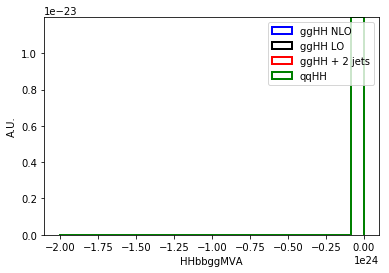

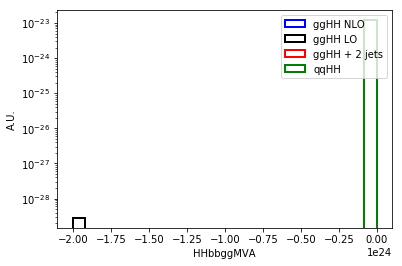

leadingJet_DeepFlavour


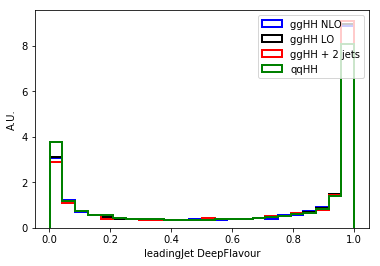

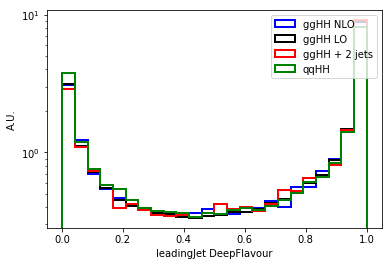

subleadingJet_DeepFlavour


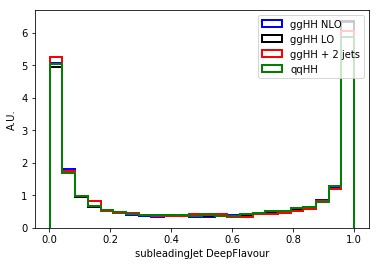

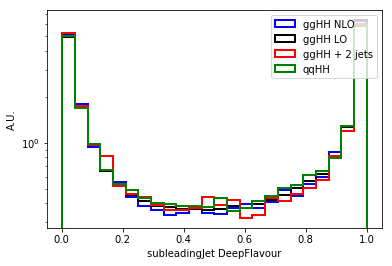

absCosThetaStar_CS


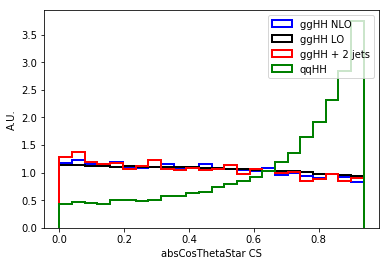

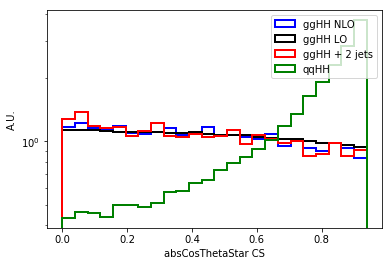

absCosTheta_bb


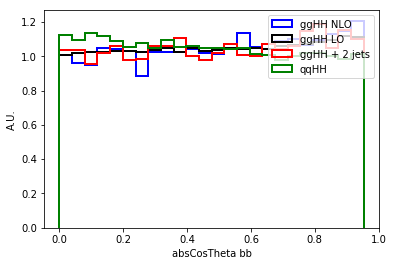

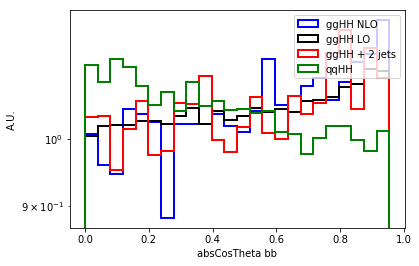

absCosTheta_gg


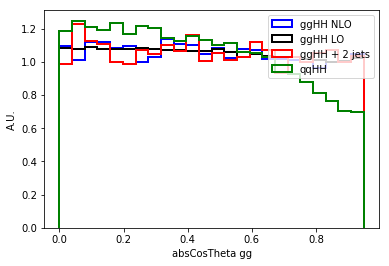

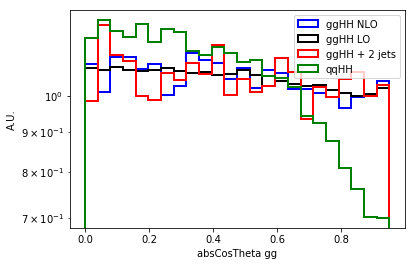

diphotonCandidatePtOverdiHiggsM


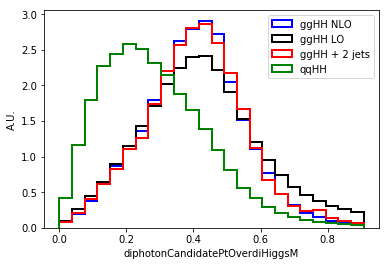

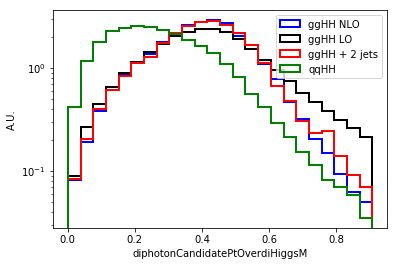

dijetCandidatePtOverdiHiggsM


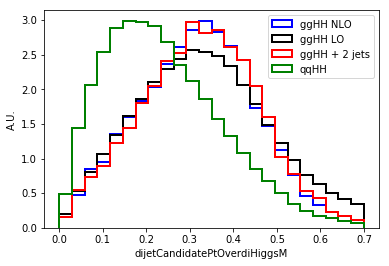

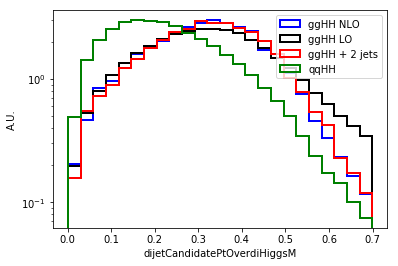

customLeadingPhotonIDMVA


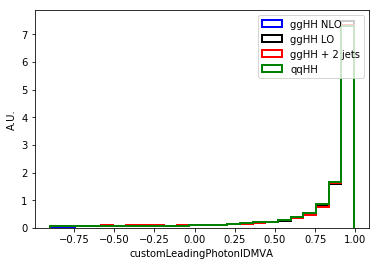

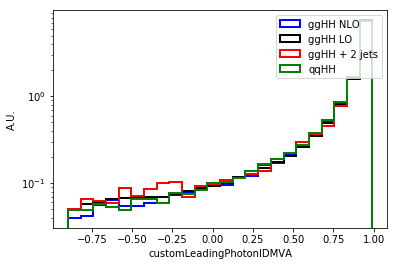

customSubLeadingPhotonIDMVA


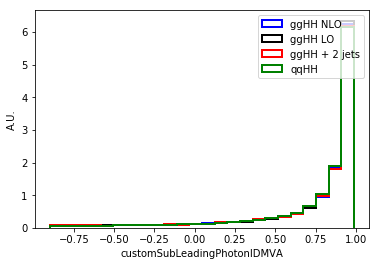

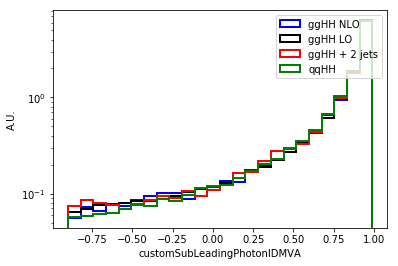

leadingPhotonSigOverE


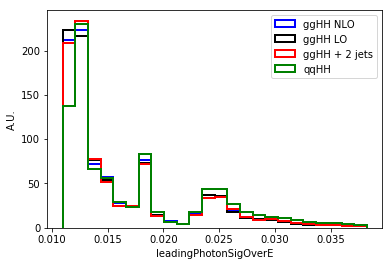

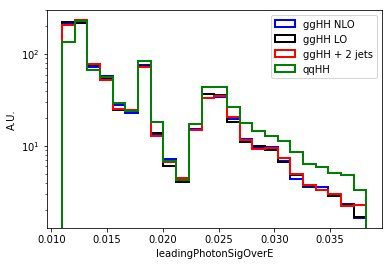

subleadingPhotonSigOverE


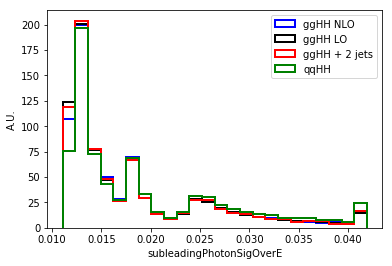

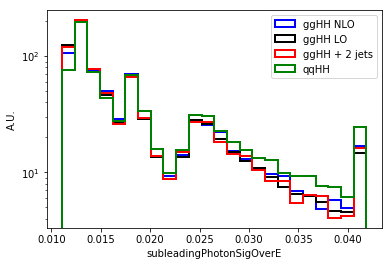

sigmaMOverM


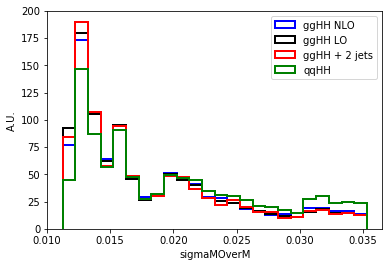

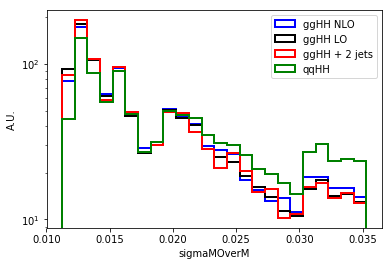

noexpand:(leadingPhoton_pt/CMS_hgg_mass)


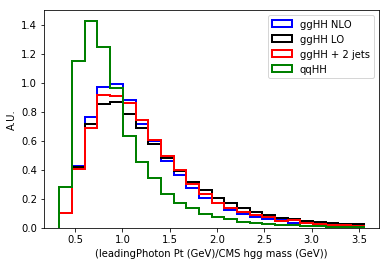

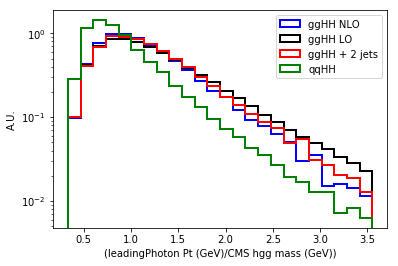

noexpand:(subleadingPhoton_pt/CMS_hgg_mass)


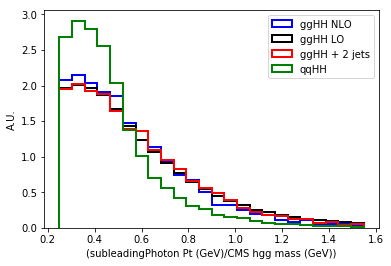

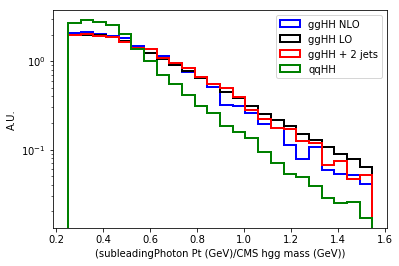

noexpand:(leadingJet_pt/Mjj)


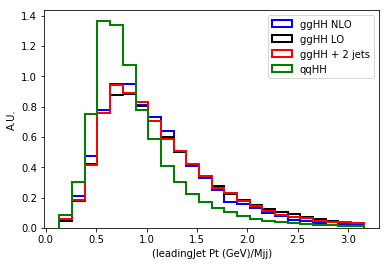

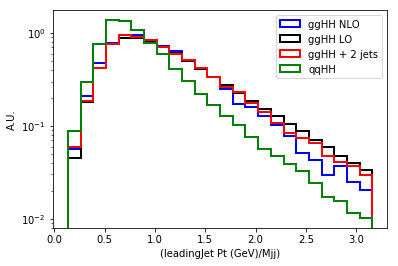

noexpand:(subleadingJet_pt/Mjj)


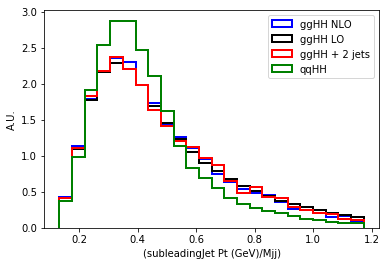

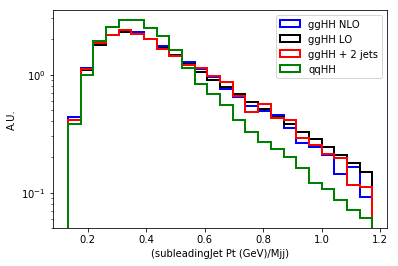

rho


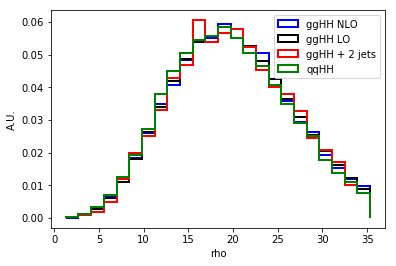

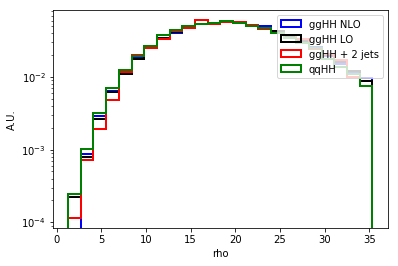

noexpand:(leadingJet_bRegNNResolution*1.4826)


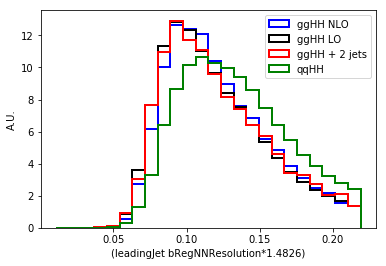

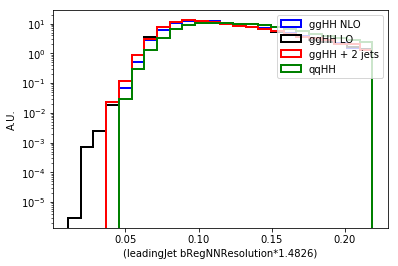

noexpand:(subleadingJet_bRegNNResolution*1.4826)


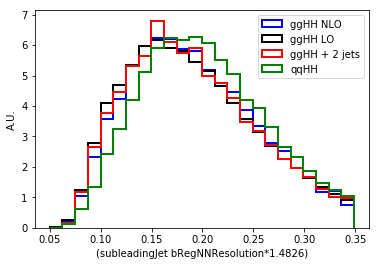

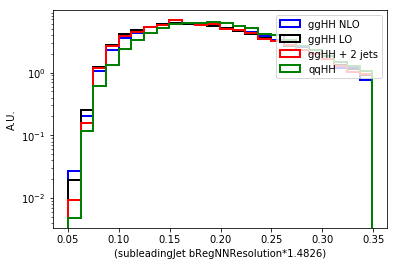

noexpand:(sigmaMJets*1.4826)


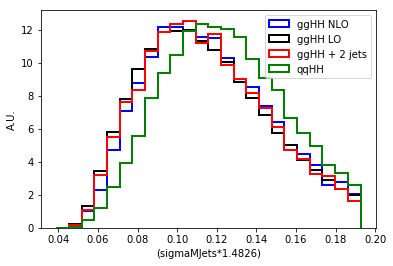

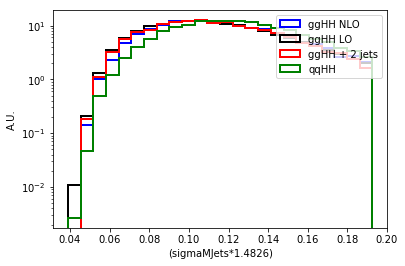

PhoJetMinDr


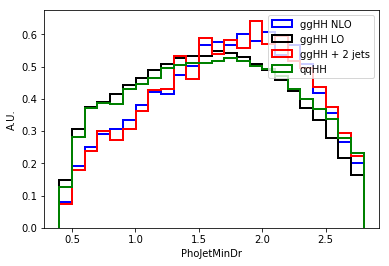

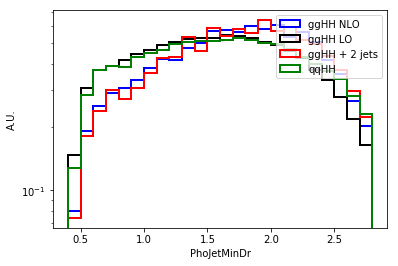

PhoJetOtherDr


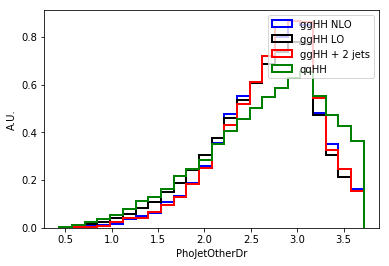

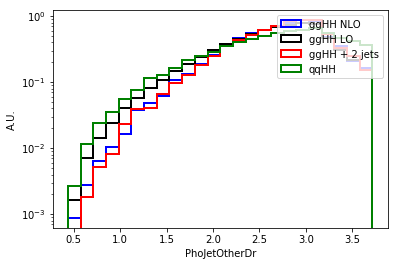

noexpand:(VBFleadJet_pt/VBFJet_mjj)


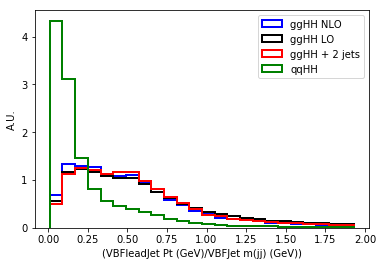

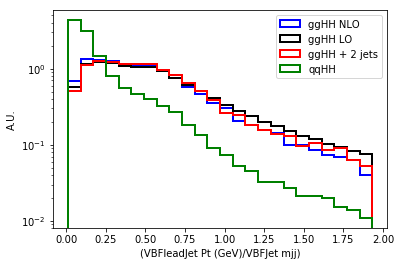

VBFleadJet_eta


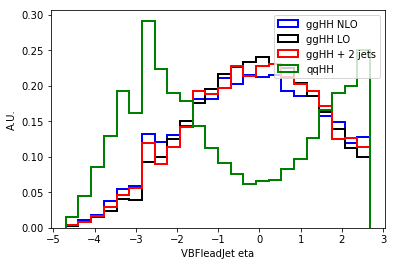

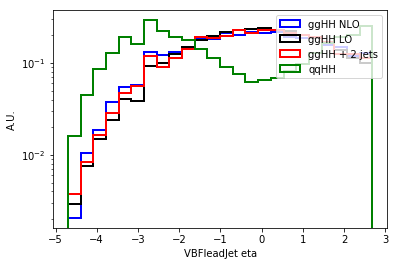

noexpand:(VBFsubleadJet_pt/VBFJet_mjj)


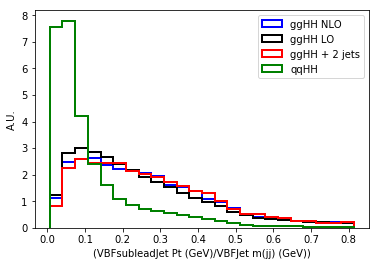

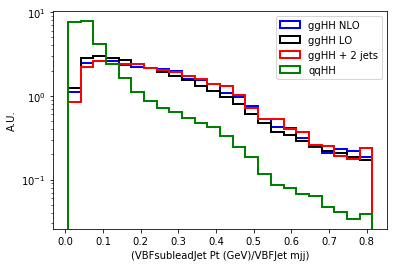

VBFsubleadJet_eta


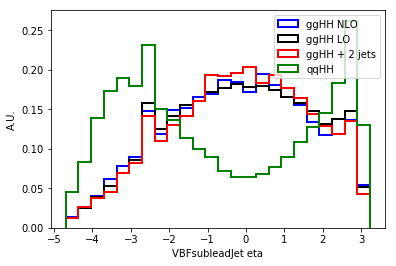

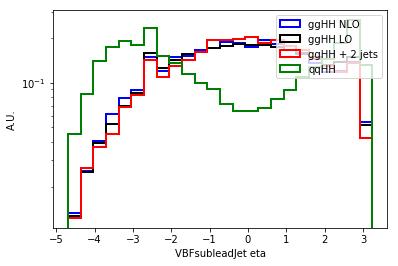

VBFCentrality_jg


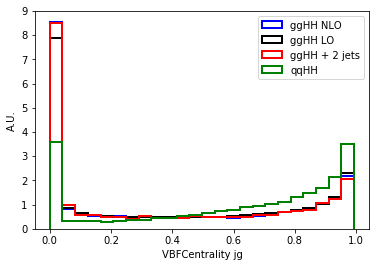

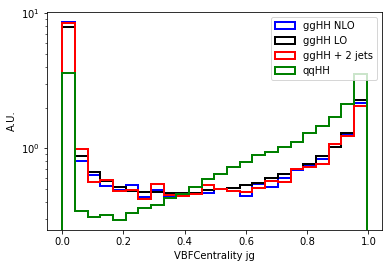

VBFCentrality_jb


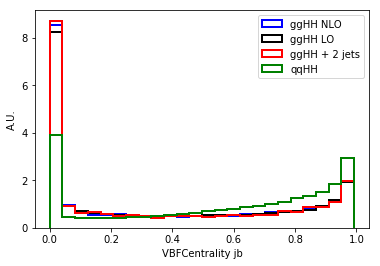

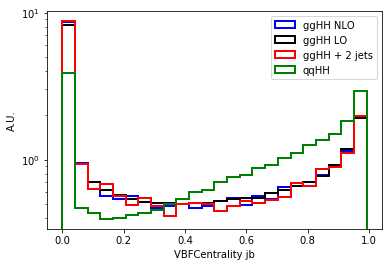

VBFDeltaR_jg


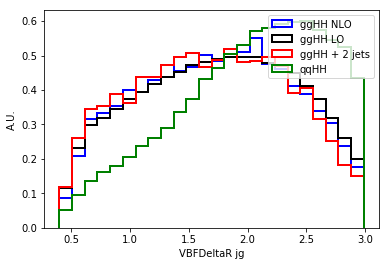

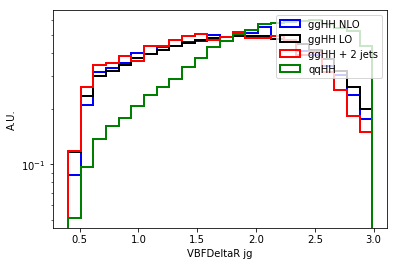

VBFDeltaR_jb


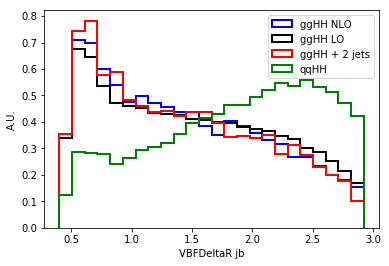

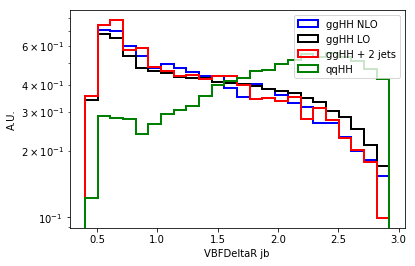

VBFProd_eta


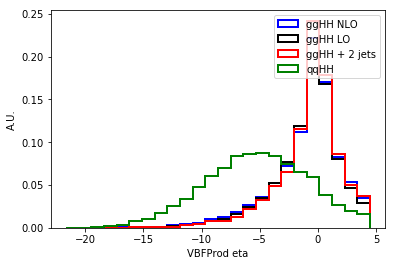

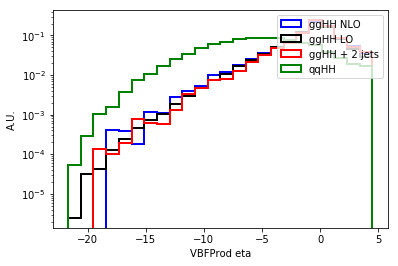

VBFJet_mjj


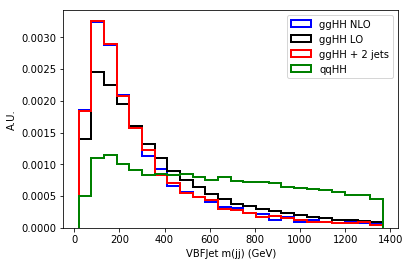

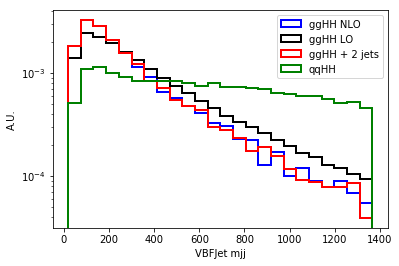

VBFJet_Delta_eta


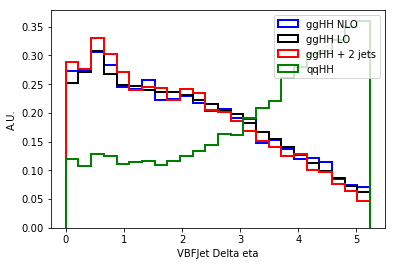

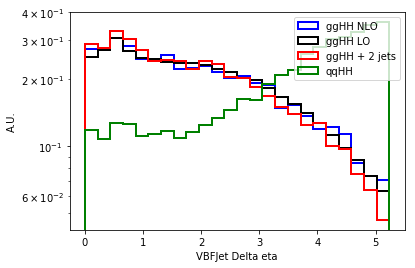

VBFleadJet_QGL


/cvmfs/sft.cern.ch/lcg/views/LCG_96/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/cvmfs/sft.cern.ch/lcg/views/LCG_96/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/numpy/lib/histograms.py:421: RuntimeWarning: invalid value encountered in greater
  if np.any(bin_edges[:-1] > bin_edges[1:]):


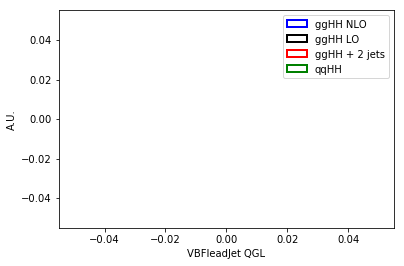

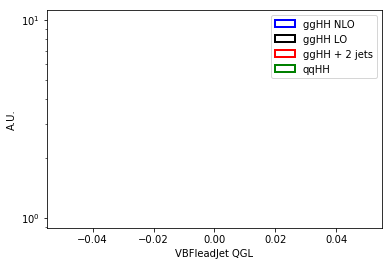

VBFsubleadJet_QGL


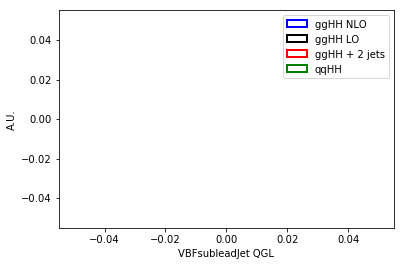

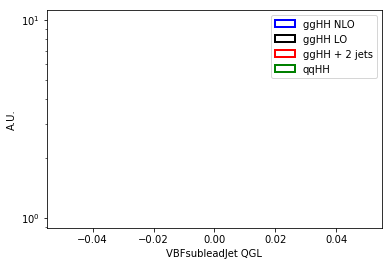

diHiggs_pt


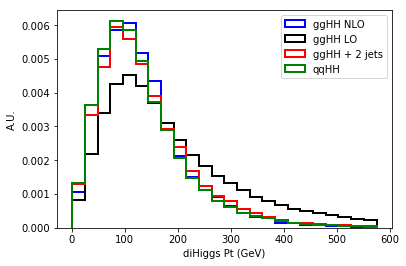

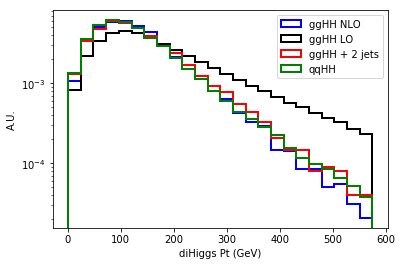

MX


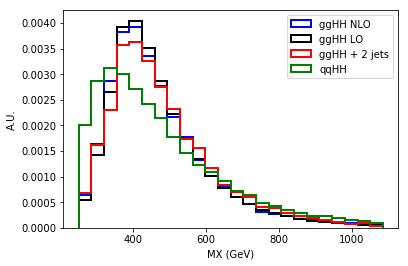

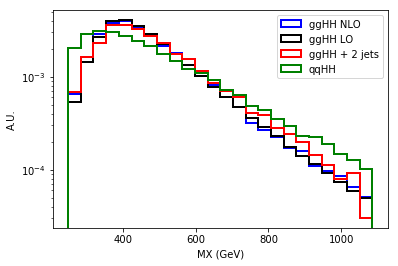

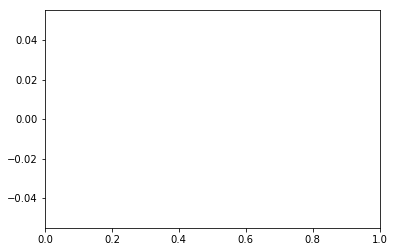

In [76]:
#plotting routine
numbins=25
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
for feat in features:
    if 'weight' in feat: 
        continue
    if 'MVAOutputTransformed' in feat: 
        continue
    print feat 
    feat=feat.replace('noexpand:','')
    #set the same range
    nbins = np.linspace(min(df_ggHH_LO[feat]), np.quantile(df_ggHH_LO[feat],0.95) , numbins)
     
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_ggHH_NLO[feat],label='ggHH NLO',histtype='step',bins=nbins,color='blue',density='True',weights=df_ggHH_NLO['weight'],linewidth=2.0)
    val_of_bins_x2, edges_of_bins_x2, patches_x2  = plt.hist(df_ggHH_LO[feat],label='ggHH LO',histtype='step',bins=nbins,color='black',density='True',weights=df_ggHH_LO['weight']*df_ggHH_LO['benchmark_reweight_SM'],linewidth=2.0)
    val_of_bins_x3, edges_of_bins_x3, patches_x3  = plt.hist(df_ggHH_2jets[feat],label='ggHH + 2 jets',histtype='step',bins=nbins,color='red',density='True',weights=df_ggHH_2jets['weight'],linewidth=2.0)
    val_of_bins_x4, edges_of_bins_x4, patches_x4  = plt.hist(df_VBFHH[feat],label='qqHH',histtype='step',bins=nbins,color='green',density='True',weights=df_VBFHH['weight'],linewidth=2.0)    
    plt.legend(loc="upper right")
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)').replace('mjj','m(jj) (GeV)'))
    plt.savefig(os.path.join(out_dir, str(feat).replace('/','_').replace('(','').replace(')','')+".png"))
    plt.show()
    
    plt.yscale('log')
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_ggHH_NLO[feat],label='ggHH NLO',histtype='step',bins=nbins,color='blue',density='True',weights=df_ggHH_NLO['weight'],linewidth=2.0)
    val_of_bins_x2, edges_of_bins_x2, patches_x2  = plt.hist(df_ggHH_LO[feat],label='ggHH LO',histtype='step',bins=nbins,color='black',density='True',weights=df_ggHH_LO['weight']*df_ggHH_LO['benchmark_reweight_SM'],linewidth=2.0)
    val_of_bins_x3, edges_of_bins_x3, patches_x3  = plt.hist(df_ggHH_2jets[feat],label='ggHH + 2 jets',histtype='step',bins=nbins,color='red',density='True',weights=df_ggHH_2jets['weight'],linewidth=2.0)
    val_of_bins_x4, edges_of_bins_x4, patches_x4  = plt.hist(df_VBFHH[feat],label='qqHH',histtype='step',bins=nbins,color='green',density='True',weights=df_VBFHH['weight'],linewidth=2.0)  
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)'))
    plt.legend(loc="upper right")
    plt.savefig(os.path.join(out_dir, str(feat).replace('/','_').replace('(','').replace(')','')+"_log.png"))


    plt.show()
    plt.yscale('linear')


In [15]:
max(df_ggHH_NLO['weight'])

0.025033723562955856

In [40]:
df_list = []
for i in range(0,12):
    df_list.append(load_data('/work/nchernya/DiHiggs/inputs/22_04_2020/trees/output_qqHH_CV_1_C2V_1_kl_1_2018.root', ['rho','weight'],'vbfhh2018_13TeV_125_13TeV_DoubleHTag_%d'%i ,'tagsDumper/trees/','')) 


Entries in ntuple:
1850
Entries in ntuple:
1054
Entries in ntuple:
1930
Entries in ntuple:
476
Entries in ntuple:
1975
Entries in ntuple:
3204
Entries in ntuple:
513
Entries in ntuple:
621
Entries in ntuple:
2790
Entries in ntuple:
8411
Entries in ntuple:
3120
Entries in ntuple:
3918


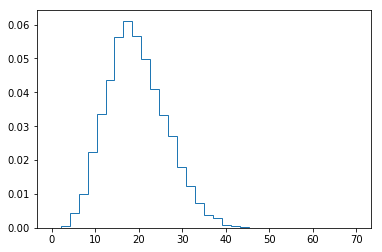

In [60]:
plt.clf()
val_of_bins_x2, edges_of_bins_x2, patches_x2  = plt.hist(df_list[11]['rho'],label='CAT 2',histtype='step',bins=np.linspace(0,70,35),density='True',weights=df_list[11]['weight'],linewidth=1.0)
#for i in range(1,12):
#    _,_,_ = plt.hist(df_list[i]['rho'],label='CAT %d'%i,histtype='step',bins=edges_of_bins_x2,density='True',weights=df_list[i]['weight'],linewidth=1.0)
    
    
    